<a href="https://colab.research.google.com/github/ArcanjoMJA/Iniciante-1/blob/main/Exemplo_AR_(1)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1- Modelo para projeção do INCC: 7456	Índice Nacional de Custo da Construção-Mercado (INCC-M)
# 2- Modelo para projeção do IPCA Alimentos e Bedidas : 1635	IPCA - Alimentação e bebidas
# 3- Modelo para projeção do IPCA15 : 7478	IPCA - 15
# 4- Modelo para Produção Industrial : 21859	Indicadores da produção (2012=100) - Geral
# 5- Modelo Venda de Veículos : 7384	Vendas de veículos pelas concessionárias - Automóveis
# 6- Modelo IGPM :  189	Índice geral de preços do mercado (IGP-M)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: xlabel='Date'>

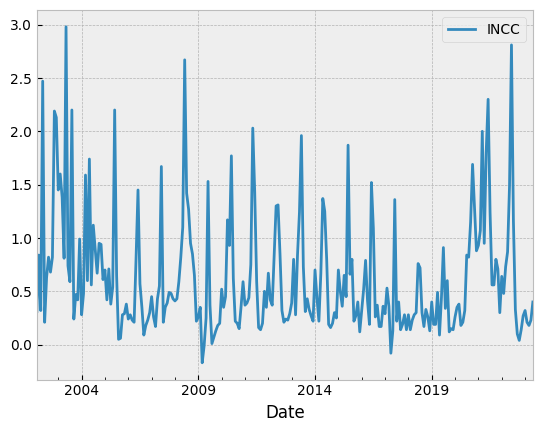

In [5]:
!pip install python-bcb
!pip install --upgrade matplotlib
#https://wilsonfreitas.github.io/python-bcb/index.html
from bcb import sgs

import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.style.use('bmh')

df = sgs.get({'INCC':7456}, start='2002-02-02')
#df = sgs.get({'IPCA': 433}, start='2002-02-01')
#df = sgs.get({'IGP-M': 189}, start='2002-02-01')



df.index = df.index.to_period('M')

df.head()


#df=df.diff()
#df.plot()
#df=df.dropna()

P-value:  0.004447061873480028


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


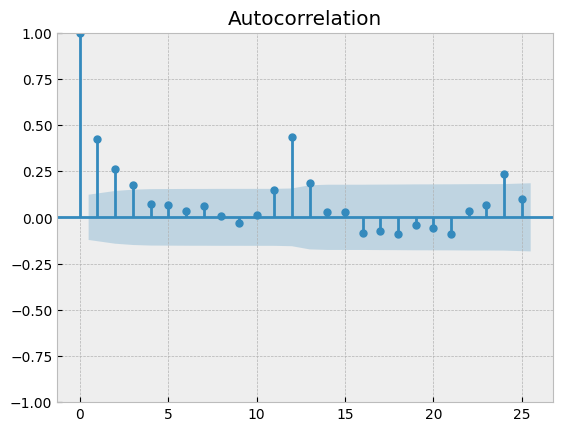

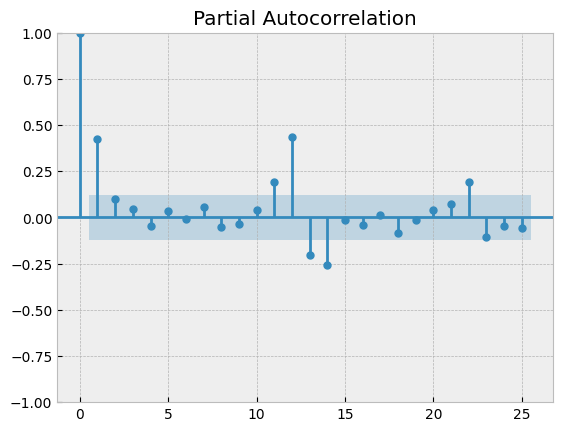

In [ ]:
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
df_stationarityTest = adfuller(df, autolag='AIC')
# Teste estatístico
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#Teste Visual
acf= plot_acf(df, lags=25)

#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#

pacf = plot_pacf(df, lags=25)

In [16]:
#
#Create training and test data
from statsmodels.tsa.ar_model import AutoReg
train_data = df['INCC'][:len(df)-12]
test_data = df['INCC'][len(df)-12:]
#train_data = df
#test_data = df



#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=10).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   INCC   No. Observations:                  244
Model:                    AutoReg(10)   Log Likelihood                -153.455
Method:               Conditional MLE   S.D. of innovations              0.466
Date:                Fri, 23 Jun 2023   AIC                            330.910
Time:                        00:38:17   BIC                            372.374
Sample:                    12-31-2002   HQIC                           347.628
                         - 05-31-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2862      0.074      3.866      0.000       0.141       0.431
INCC.L1        0.4081      0.064      6.369      0.000       0.282       0.534
INCC.L2        0.0561      0.069      0.811      0.4

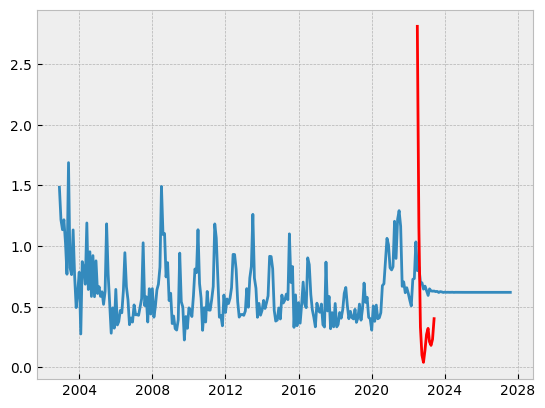

In [17]:
#
# Make the predictions
#
import pandas as pd
pred = ar_model.predict(start=0, end=(len(df)+50), dynamic=False)
#pred = ar_model.predict(start=len(train_data), end=(len(df)+3), dynamic=False)
pred
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred.to_timestamp())

pyplot.plot(test_data, color='red')

In [ ]:
pred

2002-02         NaN
2002-03    0.410992
2002-04    0.568481
2002-05    0.699722
2002-06    0.312561
             ...   
2027-04    0.508321
2027-05    0.508321
2027-06    0.508321
2027-07    0.508321
2027-08    0.508321
Freq: M, Length: 307, dtype: float64